# Car Crash Severity Capstone

## Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

With the advances of autonomous driving, interests are coextending from various stakeholders. Artifical intelligence-based detection, sensing, and planning are integrated within autonomous cars. Yet the main challenge in deployment safety to ensure crash avoidance is still an open question. Therefore, to address this problem, our main goal is to **predict the severity of a car crash**.

In this project we will try to find an the best machine learning model to observe potential car crash severity that leads to traffic or to alert the workers of city infrastructure upon upcoming disturbance in transportation. As the target groups are workers of city infrastructure and development of AI in autonomous driving, environment conditions are considered as imperative. In example, weather conditions, road conditions, including the location of crash, or type of junctions are also observed. As AI factors are also considered, human conditions serve as a great indicator in accordance for system failure. Hence, intoxication is also included in the feature.

## Data <a name="data"></a>

From the definition of the problem, we are taking into account all environmental conditions such as:

* Weather
* Road
* Light
* Junction Type

To observe prominency in automation sector, we observe human factors that contributes the severity such as:

* Intoxication
* Attention
* Number of persons included

As the severity of collisions could affect the situation in the neighborhood, that leads to potential traffic, factors below are also observed:

* Collision description
* Collision state
* Hit of cars

As data is noisy, we need to preprocess the data first. Converting objects into values and operation to both NaN and empty values. In this project, NaN is removed in target and all features associated with the particular NaN target as it does not help with classification. Otherwise, NaN in other features are marked as -1. The reason for this is to observe the whole possibility of features to be observed.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df_seattle = pd.read_csv('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_seattle.shape

(221266, 40)

In [4]:
df_seattle.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df_seattle.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


Below are data types checking, and observing variables as feature candidate.

In [6]:
df_seattle.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [7]:
df_seattle.isna().sum()

X                    7469
Y                    7469
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149443
LOCATION             4586
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209491
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26499
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11967
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191078
UNDERINFL           26479
WEATHER             26688
ROADCOND            26608
LIGHTCOND           26776
PEDROWNOTGRNT      216078
SDOTCOLNUM          94061
SPEEDING           211353
ST_COLCODE           9413
ST_COLDESC          26499
SEGLANEKEY              0
CROSSWALKKEY

In [8]:
df_seattle['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

In [9]:
# Remove NaN in target and all features associated with it as it does not help with classification
df_seattle = df_seattle[df_seattle['SEVERITYCODE'].notna()]

In [10]:
df_seattle['WEATHER'].value_counts()

Clear                       114361
Raining                      34021
Overcast                     28507
Unknown                      15131
Snowing                        919
Other                          853
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [11]:
df_seattle['ROADCOND'].value_counts()

Dry               128171
Wet                48714
Unknown            15131
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [12]:
df_seattle['LIGHTCOND'].value_counts()

Daylight                    119165
Dark - Street Lights On      50053
Unknown                      13523
Dusk                          6076
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

In [13]:
df_seattle['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              101579
At Intersection (intersection related)                69116
Mid-Block (but intersection related)                  24402
Driveway Junction                                     11495
At Intersection (but not related to intersection)      2495
Ramp Junction                                           190
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

In [14]:
df_seattle['UNDERINFL'].value_counts()

N    103481
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [15]:
df_seattle['ST_COLCODE'].value_counts()[:5]

32    44842
10    35469
14    26159
      17086
50    14120
Name: ST_COLCODE, dtype: int64

In [16]:
# Filling NaN values
df_seattle.fillna(-1, inplace=True)
df_seattle.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,-1.0,-1,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,-1,-1.0,-1,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,-1.0,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,-1,-1.0,-1,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,-1,4160038.0,-1,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,-1.0,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,-1,-1,-1,4289025.0,-1,-1,-1,0,0,N


In [17]:
# Convert data to numerical value
df_seattle['SEVERITYCODE'].replace(to_replace=['0','1','2','2b','3'], value=[0,1,2,3,4],inplace=True)
df_seattle['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

df_seattle['ST_COLCODE'].replace(to_replace=[' '], value=[-1],inplace=True)
df_seattle['ST_COLCODE'] = df_seattle['ST_COLCODE'].astype('int64', inplace=True)

df_seattle['UNDERINFL'].replace(to_replace=['N','0','Y','1'], value=[0,0,1,1],inplace=True)
df_seattle['INATTENTIONIND'].replace(to_replace=['NaN','Y'], value=[0,1],inplace=True)

junctions_ = df_seattle['JUNCTIONTYPE'].value_counts().keys().to_list()
df_seattle['JUNCTIONTYPE'].replace(to_replace=junctions_, value=list(range(len(junctions_))), inplace=True)

lights_ = df_seattle['LIGHTCOND'].value_counts().keys().to_list()
df_seattle['LIGHTCOND'].replace(to_replace=lights_, value=list(range(len(lights_))), inplace=True)

roads_ = df_seattle['ROADCOND'].value_counts().keys().to_list()
df_seattle['ROADCOND'].replace(to_replace=roads_, value=list(range(len(roads_))), inplace=True)

weather_ = df_seattle['WEATHER'].value_counts().keys().to_list()
df_seattle['WEATHER'].replace(to_replace=weather_, value=list(range(len(weather_))), inplace=True)

In [18]:
Feature = df_seattle[['WEATHER','ROADCOND','LIGHTCOND','SDOT_COLCODE','PERSONCOUNT','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','ST_COLCODE','HITPARKEDCAR']]

In [19]:
Feature

,WEATHER,ROADCOND,LIGHTCOND,SDOT_COLCODE,PERSONCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,ST_COLCODE,HITPARKEDCAR
0,0,0,0,24.0,2,1,-1,0,2,0
1,1,1,1,11.0,4,1,-1,0,10,0
2,0,0,0,14.0,4,0,-1,0,11,0
3,1,1,1,11.0,2,1,-1,0,28,0
4,3,2,2,11.0,0,2,-1,-1,-1,0
5,3,2,2,11.0,0,4,-1,-1,-1,0
6,0,0,1,28.0,2,0,-1,0,50,0
7,0,0,0,28.0,1,1,-1,0,50,0
8,0,0,1,24.0,2,0,-1,0,0,0
9,0,0,0,11.0,2,2,1,0,10,0


In [20]:
Feature.dtypes

WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
SDOT_COLCODE      float64
PERSONCOUNT         int64
JUNCTIONTYPE        int64
INATTENTIONIND      int64
UNDERINFL           int64
ST_COLCODE          int64
HITPARKEDCAR        int64
dtype: object

After creating features table and target classes, we would like to observe the variables included in the feature vector by using correlation matrix.

In [21]:
y = df_seattle['SEVERITYCODE']

In [22]:
# Check correlation for features and target
corr_check = Feature.merge(y.to_frame(), left_index=True, right_index=True)
corr_check = corr_check.corr()
corr_check.style.background_gradient(cmap='RdBu_r')

,WEATHER,ROADCOND,LIGHTCOND,SDOT_COLCODE,PERSONCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,ST_COLCODE,HITPARKEDCAR,SEVERITYCODE
WEATHER,1,0.754008,0.402468,-0.216594,-0.266384,0.0469144,-0.135614,-0.437789,-0.163403,0.153363,-0.358968
ROADCOND,0.754008,1,0.398593,-0.201116,-0.254065,0.0370012,-0.141003,-0.407452,-0.126886,0.147789,-0.343946
LIGHTCOND,0.402468,0.398593,1,-0.10913,-0.180661,-0.000788514,-0.107549,-0.231688,-0.0451975,0.115355,-0.232244
SDOT_COLCODE,-0.216594,-0.201116,-0.10913,1,0.00832317,-0.179434,0.055654,0.260193,0.332624,-0.158463,0.311602
PERSONCOUNT,-0.266384,-0.254065,-0.180661,0.00832317,1,-0.0323729,0.125228,0.383241,0.0520425,-0.11906,0.370575
JUNCTIONTYPE,0.0469144,0.0370012,-0.000788514,-0.179434,-0.0323729,1,-0.0139191,-0.0794896,-0.0981703,-0.00951596,-0.0306037
INATTENTIONIND,-0.135614,-0.141003,-0.107549,0.055654,0.125228,-0.0139191,1,0.111212,0.033378,-0.0215269,0.107642
UNDERINFL,-0.437789,-0.407452,-0.231688,0.260193,0.383241,-0.0794896,0.111212,1,0.462324,-0.175261,0.518683
ST_COLCODE,-0.163403,-0.126886,-0.0451975,0.332624,0.0520425,-0.0981703,0.033378,0.462324,1,-0.0219944,0.179909
HITPARKEDCAR,0.153363,0.147789,0.115355,-0.158463,-0.11906,-0.00951596,-0.0215269,-0.175261,-0.0219944,1,-0.201678


From all the features included, surprisingly the type of the junction is not that prominent with the correlation to the severity of a crash. Among 10 features included, **type of junction is the lowest prominent**, followed by attention of the driver to the road. On the other hand, intoxication to the driver has the biggest correlation to the severity of a crash. If this is reported to the stakeholders with the intention of developing Safe Autonomous Driving, this could act as a base to strengthen the business value of autonomous vehicles.

## Methodology <a name="methodology"></a>

In this project we will normalize the data. Data standardization or normalization give data zero mean and unit variance. In the first section, data has been preprocessed and features are extracted from the data according to the perspective of the stakeholders. We will then build our machine learning models based on the features. As data is imbalanced, as checked in the first section, we will stratify the data such that division of classes for training and testing encompass all the classes evenly. Here three machine learning models are compared:

* K-Nearest Neighbor
* Decision Tree
* Logistic Regression

One method that does not observed is SVM. The reason being SVM is computationally exhaustive, training time for traditional SVM algorithms also scales superlinearly with the number of data points. However, other three machine learning algorithms are able to classify multi-class problems with large dataset. The approach for logistic regression is one vs all, where identification is done by binary classification whether the data belongs to that class or any other class. K-NN has fast computation and suitable for multi-class classification.

### Normalize Data

In [23]:
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)

### Classification

To address the imbalanced data, stratification is used to split train and test data to ensure both has the same distribution of data.

In [24]:
# Stratify the split of train and test to keep distribution among test and train set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (177012, 10) (177012,)
Test set: (44253, 10) (44253,)


In [25]:
!pip install imblearn

In [25]:
# Use SMOTE to upsample training
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=4)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

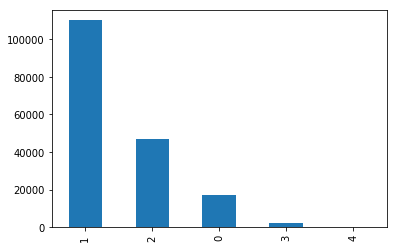

In [45]:
pd.DataFrame(list(y_train))[0].value_counts().plot(kind='bar')

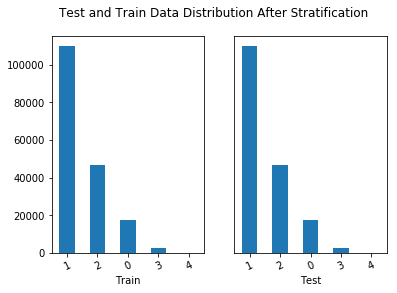

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ytrain_ = pd.DataFrame(list(y_train))
ytrain_ = ytrain_[0].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticklabels([1,2,0,3,4],rotation=25)
ax1.set_xlabel('Train')
ytest_ = pd.DataFrame(list(y_test))
ytest_[0].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xticklabels([1,2,0,3,4],rotation=25)
ax2.get_yaxis().set_ticks([])
ax2.set_xlabel('Test')
fig.suptitle('Test and Train Data Distribution After Stratification')
plt.show()

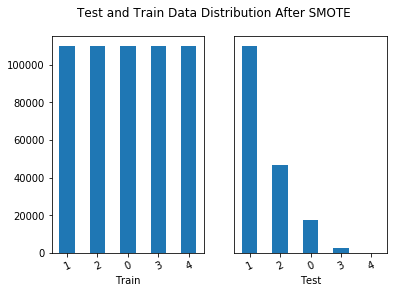

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ytrain_ = pd.DataFrame(list(y_train_SMOTE))
ytrain_ = ytrain_[0].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticklabels([1,2,0,3,4],rotation=25)
ax1.set_xlabel('Train')
ytest_ = pd.DataFrame(list(y_test))
ytest_[0].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xticklabels([1,2,0,3,4],rotation=25)
ax2.get_yaxis().set_ticks([])
ax2.set_xlabel('Test')
fig.suptitle('Test and Train Data Distribution After SMOTE')
plt.show()

#### Build KNN, Decision Tree, and Logistic Regression

Best accuracy for KNN:  0.712607054888934  k:  2


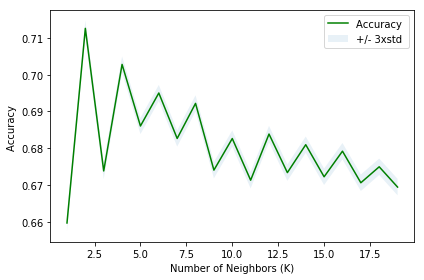

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### KNN
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    kNN = KNeighborsClassifier(n_neighbors=k).fit(X_train_SMOTE, y_train_SMOTE)
    yhat= kNN.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
k = np.where(mean_acc == max(mean_acc))[0][0]+1
print('Best accuracy for KNN: ',max(mean_acc), ' k: ', k)

# See the plot for the best k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Build the KNN model with the best k
kNN = KNeighborsClassifier(n_neighbors=k).fit(X_train_SMOTE, y_train_SMOTE)

In [30]:
##### Decision Tree
depth = 15
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))
for d in range(1,depth):
    crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    crashTree.fit(X_train_SMOTE,y_train_SMOTE)
    predTree = crashTree.predict(X_test)
    mean_acc[d-1] = accuracy_score(y_test, predTree)

depth = np.where(mean_acc == max(mean_acc))[0][0]+1
print('Best accuracy for Decision Tree: ',max(mean_acc), ' depth: ', depth)
# Build the Decision Tree model with the best depth
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth).fit(X_train_SMOTE,y_train_SMOTE)

##### Logistic Regression
C_param_range = [0.001,0.01,0.1,1,10,100]

mean_acc = np.zeros((len(C_param_range)))
std_acc = np.zeros((len(C_param_range)))

for c in range(len(C_param_range)):
    LR = LogisticRegression(C=C_param_range[c], solver='liblinear').fit(X_train_SMOTE,y_train_SMOTE)
    yhat = LR.predict(X_test)
    mean_acc[c-1] = accuracy_score(y_test, yhat)
    std_acc[c-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
c_max = C_param_range[np.where(mean_acc == max(mean_acc))[0][0]]
print('Logistic Regression\'s best acc: ',max(mean_acc), ' Regularization Values: ', c_max)

#Build the Logistic Regression model with max performance
LR = LogisticRegression(C=c_max, solver='liblinear').fit(X_train_SMOTE,y_train_SMOTE)

Best accuracy for Decision Tree:  0.6552098162836418  depth:  5
Logistic Regression's best acc:  0.5150611257993808  Regularization Values:  1


## Results <a name="results"></a>

### Model Evaluation

Models are evaluated on test dataset using 5 metrics as follows:

* F1-score : measure of model accuracy by calculation of harmonic mean and recall
* LogLoss : a loss function that quantify false predictions
* Precision (Specificity) : how many instances selected among test are relevant 
* Recall (Sensitivity) : calculate how many relevant instances are selected

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes, title=title,
       ylabel='True label', xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

np.set_printoptions(precision=2)
class_names = ['0','1','2','2b','3']

Confusion matrix for kNN is as follows: 
 AxesSubplot(0.025,0.165966;0.76x0.740978)
Confusion matrix for Decision Tree is as follows: 
 AxesSubplot(0.025,0.165966;0.76x0.740978)
Confusion matrix for Logistic Regression is as follows: 
 AxesSubplot(0.025,0.165966;0.76x0.740978)


,Algorithm,F1-score,LogLoss,Precision,Recall
0,KNN,0.460101,NA,0.458644,0.464136
1,Decision Tree,0.388289,NA,0.438632,0.55528
2,Logistic Regression,0.391077,1.12381,0.405484,0.519521


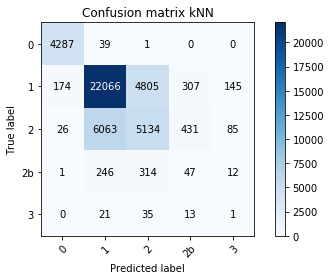

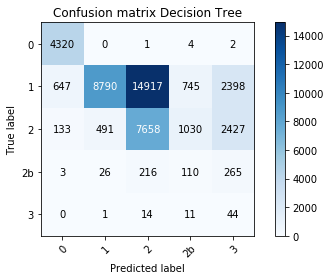

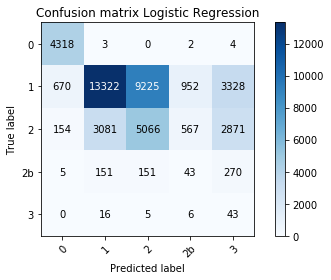

In [40]:
from sklearn.metrics import f1_score, log_loss, precision_score, recall_score, confusion_matrix

report = {}

# KNN
yhat_knn= kNN.predict(X_test)
print("Confusion matrix for kNN is as follows: \n", plot_confusion_matrix(y_test, yhat_knn, classes=class_names, title='Confusion matrix kNN'))
report['KNN']=[f1_score(y_test, yhat_knn, average='macro'),'NA', precision_score(y_test, yhat_knn, average='macro'), recall_score(y_test, yhat_knn, average='macro')]

# Decision Tree
yhat_tree = crashTree.predict(X_test)
print("Confusion matrix for Decision Tree is as follows: \n",plot_confusion_matrix(y_test, yhat_tree, classes=class_names, title='Confusion matrix Decision Tree'))
report['Decision Tree']=[f1_score(y_test, yhat_tree, average='macro'),'NA', precision_score(y_test, yhat_tree, average='macro'), recall_score(y_test, yhat_tree, average='macro')]

# Logistic Regression
yhat_lr = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("Confusion matrix for Logistic Regression is as follows: \n",plot_confusion_matrix(y_test, yhat_lr, classes=class_names, title='Confusion matrix Logistic Regression'))
report['Logistic Regression']=[f1_score(y_test, yhat_lr, average='macro'),log_loss(y_test, yhat_prob), precision_score(y_test, yhat_lr, average='macro'), recall_score(y_test, yhat_lr, average='macro')]

report = pd.DataFrame(report).transpose()
report.reset_index(inplace=True)
report.columns = ['Algorithm','F1-score','LogLoss','Precision', 'Recall']
report

## Discussion <a name="discussion"></a>

* In the results, it shows that among three machine learning methods, KNN excels other methods with only small difference in recall. Although KNN provide the best performance evaluation, parameter tuning in KNN is computationally exhaustive. In this experiment it is not proven the higher K is, the more probability that the model overfits the data, this could happen in defiance to the data being imbalanced. Improvement could be done by applying cross-validation to the test data, as the real test data would also contain imbalanced distribution.

* In using decision tree, the maximum depth is 5 for the best accuracy performance on training data. Hence this value will be used for testing.

* For logistic regression, regularization factor that built maximum performance is when C=1.

* Among all the ML methods, kNN is the safest approach as prediction using either Decision Tree or Logistic Regression has higher value in mis-classifying high probability of severe accident (type 3)  with low probability accidents (type 1 and type 2).

* It is found that Jaccard's index calculation in sklearn is different for multiclass, making it calculate the same as accuracy value. [link](https://github.com/scikit-learn/scikit-learn/issues/7332). Hence, it is advised to build a custom calculation for Jaccard index in multiclass classification. 

* To optimize the selection of features, using PCA is advisable to fasten the process of prominent feature selection.

## Conclusion <a name="conclusion"></a>

Based on Seattle GeoData for car collisions, among 40 attributes which has a potential value in predicting car crash severity, human intoxication factor is still the highest feature importance that take part in severity of car accidents. Among environment conditions, weather is imperative to contribute in car collisions, while location of the collision, such as junctions, are exceptionally insignificant. To predict whether collision will affect traffic, with the state of property damage to severity that leads to fatal injuries of the accident, it could be classified effectively using kNN, which had performed better than Decision Tree or Logistic Regression in comparison using 4 evaluation metrics.